# 4_추가모델링  
모델마다 다른 행

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

감정분석 결과

In [4]:
sentiment_result = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/sentiment_result.csv")

In [5]:
sentiment_result

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign
0,2023-01,0.33,0.19,1.73,NaN,NaN,NaN
1,2023-02,0.32,0.09,3.52,0.50,0.00,10.00
2,2023-03,0.36,0.10,3.56,0.75,0.25,2.73
3,2023-04,0.39,0.05,7.65,1.00,0.00,20.00
4,2023-05,0.25,0.11,2.25,0.75,0.00,30.00
5,2023-06,0.28,0.04,6.83,0.88,0.12,6.36
6,2023-07,0.36,0.12,2.98,NaN,NaN,NaN
7,2023-08,0.36,0.11,3.24,0.40,0.60,0.65
8,2023-09,0.33,0.12,2.73,1.00,0.00,10.00
9,2023-10,0.30,0.11,2.70,1.00,0.00,20.00


## 모델별 데이터

판매량

In [6]:
sales = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/hyundai_ev_unit_sales.csv")

In [7]:
sales

,date,IONIQ6_d,IONIQ6_e,IONIQ5_d,IONIQ5_e,EV6_d,EV6_e,EV9_d,EV9_e
0,202301,23,3818,76,6989,0,6919,0,0
1,202302,1632,4931,1911,7845,1951,6873,0,0
2,202303,2200,6261,1701,7474,3009,8063,0,7
3,202304,1316,3275,2123,7474,2694,6727,0,19
4,202305,1117,3728,2396,8242,1894,7777,0,11
5,202306,491,5913,1297,7723,1379,7838,1334,3
6,202307,488,4065,1350,7215,1398,7647,1251,30
7,202308,400,3217,1061,6725,948,5968,408,2254
8,202309,344,3272,612,6260,601,3706,1163,4852
9,202310,472,2800,1376,7669,1564,4291,833,3957


In [8]:
sales['IONIQ5'] = sales['IONIQ5_e'] + sales['IONIQ5_d']
sales['IONIQ6'] = sales['IONIQ6_e'] + sales['IONIQ6_d']
sales['EV6'] = sales['EV6_e'] + sales['EV6_d']
sales['EV9'] = sales['EV9_e'] + sales['EV9_d']

In [9]:
sales = sales[['date', 'IONIQ5', 'IONIQ6', 'EV6', 'EV9']]

In [10]:
sales['date'] = pd.to_datetime(sales['date'], format='%Y%m').dt.strftime('%Y-%m')

In [11]:
sales = sales.rename(columns={"date":"month"})

In [12]:
sales

,month,IONIQ5,IONIQ6,EV6,EV9
0,2023-01,7065,3841,6919,0
1,2023-02,9756,6563,8824,0
2,2023-03,9175,8461,11072,7
3,2023-04,9597,4591,9421,19
4,2023-05,10638,4845,9671,11
5,2023-06,9020,6404,9217,1337
6,2023-07,8565,4553,9045,1281
7,2023-08,7786,3617,6916,2662
8,2023-09,6872,3616,4307,6015
9,2023-10,9045,3272,5855,4790


google trends

In [13]:
search1 = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/hydkia_googletrends.csv", skiprows=2)

In [14]:
search1['주'] = pd.to_datetime(search1['주'], format="%Y-%m-%d").dt.strftime("%Y-%m")

In [15]:
search1.columns = ['month', 'IONIQ5', 'IONIQ6', 'EV6', 'EV9']

In [16]:
search1 = search1.groupby('month').sum().reset_index()

In [17]:
search1

,month,IONIQ5,IONIQ6,EV6,EV9
0,2023-01,398,166,370,41
1,2023-02,277,139,251,30
2,2023-03,269,133,234,134
3,2023-04,339,175,330,114
4,2023-05,254,132,243,77
5,2023-06,260,133,238,100
6,2023-07,412,161,310,121
7,2023-08,271,125,230,107
8,2023-09,265,122,219,101
9,2023-10,332,153,253,133


In [18]:
search2 = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/tslbyd_googletrends.csv", skiprows=2)

In [19]:
search2['주'] = pd.to_datetime(search2['주'], format="%Y-%m-%d").dt.strftime("%Y-%m")

In [20]:
search2.columns = ['month', 'modelY', 'model3', 'Song', 'Atto3']

In [21]:
search2 = search2.groupby('month').sum().reset_index()

In [22]:
search2.loc[0, "Atto3"] = 3
search2.loc[1, "Atto3"] = 3

In [23]:
search2['Tesla'] = search2['modelY'] + search2['model3']

In [24]:
search2

,month,modelY,model3,Song,Atto3,Tesla
0,2023-01,315,257,5,3,572
1,2023-02,201,184,4,3,385
2,2023-03,191,178,4,2223,369
3,2023-04,307,257,6,33456,564
4,2023-05,212,187,4,6577,399
5,2023-06,215,215,8,6777,430
6,2023-07,282,290,10,77777,572
7,2023-08,217,276,9,8777,493
8,2023-09,218,269,9,8788,487
9,2023-10,276,286,15,87867,562


감성분석 결과

In [25]:
sentiment_result = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/sentiment_result.csv")

In [26]:
sentiment_result[['p_foreign', 'n_foreign', 'pnr_foreign']] = sentiment_result[['p_foreign', 'n_foreign', 'pnr_foreign']].interpolate(method='linear', limit_direction='both')

In [27]:
sentiment_result

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign
0,2023-01,0.33,0.19,1.73,0.50,0.00,10.000
1,2023-02,0.32,0.09,3.52,0.50,0.00,10.000
2,2023-03,0.36,0.10,3.56,0.75,0.25,2.730
3,2023-04,0.39,0.05,7.65,1.00,0.00,20.000
4,2023-05,0.25,0.11,2.25,0.75,0.00,30.000
5,2023-06,0.28,0.04,6.83,0.88,0.12,6.360
6,2023-07,0.36,0.12,2.98,0.64,0.36,3.505
7,2023-08,0.36,0.11,3.24,0.40,0.60,0.650
8,2023-09,0.33,0.12,2.73,1.00,0.00,10.000
9,2023-10,0.30,0.11,2.70,1.00,0.00,20.000


### df 합치기

In [28]:
ioniq5 = pd.merge(search1[['month', 'IONIQ5']], search2[['month', 'modelY', 'model3']], on='month', how='outer')

In [29]:
ioniq5 = pd.merge(ioniq5, sentiment_result, on ='month', how='outer')

In [30]:
ioniq5

,month,IONIQ5,modelY,model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign
0,2023-01,398,315,257,0.33,0.19,1.73,0.50,0.00,10.000
1,2023-02,277,201,184,0.32,0.09,3.52,0.50,0.00,10.000
2,2023-03,269,191,178,0.36,0.10,3.56,0.75,0.25,2.730
3,2023-04,339,307,257,0.39,0.05,7.65,1.00,0.00,20.000
4,2023-05,254,212,187,0.25,0.11,2.25,0.75,0.00,30.000
5,2023-06,260,215,215,0.28,0.04,6.83,0.88,0.12,6.360
6,2023-07,412,282,290,0.36,0.12,2.98,0.64,0.36,3.505
7,2023-08,271,217,276,0.36,0.11,3.24,0.40,0.60,0.650
8,2023-09,265,218,269,0.33,0.12,2.73,1.00,0.00,10.000
9,2023-10,332,276,286,0.30,0.11,2.70,1.00,0.00,20.000


In [31]:
ioniq5 = ioniq5.rename(columns={"IONIQ5":"search", "modelY":"search_modelY", "model3":"search_model3"})

In [32]:
ioniq5 = pd.merge(ioniq5, sales[['month', 'IONIQ5']], on = 'month', how='outer')

In [33]:
ioniq5

,month,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,IONIQ5
0,2023-01,398,315,257,0.33,0.19,1.73,0.50,0.00,10.000,7065.0
1,2023-02,277,201,184,0.32,0.09,3.52,0.50,0.00,10.000,9756.0
2,2023-03,269,191,178,0.36,0.10,3.56,0.75,0.25,2.730,9175.0
3,2023-04,339,307,257,0.39,0.05,7.65,1.00,0.00,20.000,9597.0
4,2023-05,254,212,187,0.25,0.11,2.25,0.75,0.00,30.000,10638.0
5,2023-06,260,215,215,0.28,0.04,6.83,0.88,0.12,6.360,9020.0
6,2023-07,412,282,290,0.36,0.12,2.98,0.64,0.36,3.505,8565.0
7,2023-08,271,217,276,0.36,0.11,3.24,0.40,0.60,0.650,7786.0
8,2023-09,265,218,269,0.33,0.12,2.73,1.00,0.00,10.000,6872.0
9,2023-10,332,276,286,0.30,0.11,2.70,1.00,0.00,20.000,9045.0


In [34]:
ioniq5['model'] = "IONIQ5"

In [35]:
ioniq5 = ioniq5.rename(columns={'IONIQ5':'sales'})

In [36]:
ioniq5['previous_month_sales'] = ioniq5['sales'].shift(1)
ioniq5.loc[0, 'previous_month_sales'] = 711 + 9554

In [37]:
ioniq5

,month,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,sales,model,previous_month_sales
0,2023-01,398,315,257,0.33,0.19,1.73,0.50,0.00,10.000,7065.0,IONIQ5,10265.0
1,2023-02,277,201,184,0.32,0.09,3.52,0.50,0.00,10.000,9756.0,IONIQ5,7065.0
2,2023-03,269,191,178,0.36,0.10,3.56,0.75,0.25,2.730,9175.0,IONIQ5,9756.0
3,2023-04,339,307,257,0.39,0.05,7.65,1.00,0.00,20.000,9597.0,IONIQ5,9175.0
4,2023-05,254,212,187,0.25,0.11,2.25,0.75,0.00,30.000,10638.0,IONIQ5,9597.0
5,2023-06,260,215,215,0.28,0.04,6.83,0.88,0.12,6.360,9020.0,IONIQ5,10638.0
6,2023-07,412,282,290,0.36,0.12,2.98,0.64,0.36,3.505,8565.0,IONIQ5,9020.0
7,2023-08,271,217,276,0.36,0.11,3.24,0.40,0.60,0.650,7786.0,IONIQ5,8565.0
8,2023-09,265,218,269,0.33,0.12,2.73,1.00,0.00,10.000,6872.0,IONIQ5,7786.0
9,2023-10,332,276,286,0.30,0.11,2.70,1.00,0.00,20.000,9045.0,IONIQ5,6872.0


In [38]:
ioniq6 = pd.merge(search1[['month', 'IONIQ6']], search2[['month', 'modelY', 'model3']], on='month', how='outer')

In [39]:
ioniq6 = pd.merge(ioniq6, sentiment_result, on ='month', how='outer')

In [40]:
ioniq6 = ioniq6.rename(columns={"IONIQ6":"search", "modelY":"search_modelY", "model3":"search_model3"})

In [41]:
ioniq6 = pd.merge(ioniq6, sales[['month', 'IONIQ6']], on = 'month', how='outer')

In [42]:
ioniq6['model'] = "IONIQ6"
ioniq6 = ioniq6.rename(columns={'IONIQ6':'sales'})

In [43]:
ioniq6['previous_month_sales'] = ioniq6['sales'].shift(1)
ioniq6.loc[0, 'previous_month_sales'] = 1057 + 3503

In [44]:
ioniq6

,month,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,sales,model,previous_month_sales
0,2023-01,166,315,257,0.33,0.19,1.73,0.50,0.00,10.000,3841.0,IONIQ6,4560.0
1,2023-02,139,201,184,0.32,0.09,3.52,0.50,0.00,10.000,6563.0,IONIQ6,3841.0
2,2023-03,133,191,178,0.36,0.10,3.56,0.75,0.25,2.730,8461.0,IONIQ6,6563.0
3,2023-04,175,307,257,0.39,0.05,7.65,1.00,0.00,20.000,4591.0,IONIQ6,8461.0
4,2023-05,132,212,187,0.25,0.11,2.25,0.75,0.00,30.000,4845.0,IONIQ6,4591.0
5,2023-06,133,215,215,0.28,0.04,6.83,0.88,0.12,6.360,6404.0,IONIQ6,4845.0
6,2023-07,161,282,290,0.36,0.12,2.98,0.64,0.36,3.505,4553.0,IONIQ6,6404.0
7,2023-08,125,217,276,0.36,0.11,3.24,0.40,0.60,0.650,3617.0,IONIQ6,4553.0
8,2023-09,122,218,269,0.33,0.12,2.73,1.00,0.00,10.000,3616.0,IONIQ6,3617.0
9,2023-10,153,276,286,0.30,0.11,2.70,1.00,0.00,20.000,3272.0,IONIQ6,3616.0


In [45]:
ev6 = pd.merge(search1[['month', 'EV6']], search2[['month', 'modelY', 'model3']], on='month', how='outer')

In [46]:
ev6 = pd.merge(ev6, sentiment_result, on ='month', how='outer')

In [47]:
ev6 = ev6.rename(columns={"EV6":"search", "modelY":"search_modelY", "model3":"search_model3"})

In [48]:
ev6 = pd.merge(ev6, sales[['month', 'EV6']], on = 'month', how='outer')

In [49]:
ev6['model'] = "EV6"
ev6 = ev6.rename(columns={'EV6':'sales'})

In [50]:
ev6['previous_month_sales'] = ev6['sales'].shift(1)
ev6.loc[0, 'previous_month_sales'] = 1237 + 6391

In [51]:
ev6

,month,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,sales,model,previous_month_sales
0,2023-01,370,315,257,0.33,0.19,1.73,0.50,0.00,10.000,6919.0,EV6,7628.0
1,2023-02,251,201,184,0.32,0.09,3.52,0.50,0.00,10.000,8824.0,EV6,6919.0
2,2023-03,234,191,178,0.36,0.10,3.56,0.75,0.25,2.730,11072.0,EV6,8824.0
3,2023-04,330,307,257,0.39,0.05,7.65,1.00,0.00,20.000,9421.0,EV6,11072.0
4,2023-05,243,212,187,0.25,0.11,2.25,0.75,0.00,30.000,9671.0,EV6,9421.0
5,2023-06,238,215,215,0.28,0.04,6.83,0.88,0.12,6.360,9217.0,EV6,9671.0
6,2023-07,310,282,290,0.36,0.12,2.98,0.64,0.36,3.505,9045.0,EV6,9217.0
7,2023-08,230,217,276,0.36,0.11,3.24,0.40,0.60,0.650,6916.0,EV6,9045.0
8,2023-09,219,218,269,0.33,0.12,2.73,1.00,0.00,10.000,4307.0,EV6,6916.0
9,2023-10,253,276,286,0.30,0.11,2.70,1.00,0.00,20.000,5855.0,EV6,4307.0


In [52]:
ev9= pd.merge(search1[['month', 'EV9']], search2[['month', 'modelY', 'model3']], on='month', how='outer')

In [53]:
ev9 = pd.merge(ev9, sentiment_result, on ='month', how='outer')

In [54]:
ev9 = ev9.rename(columns={"EV9":"search", "modelY":"search_modelY", "model3":"search_model3"})

In [55]:
ev9 = pd.merge(ev9, sales[['month', 'EV9']], on = 'month', how='outer')

In [56]:
ev9['model'] = "EV9"
ev9 = ev9.rename(columns={'EV9':'sales'})

In [57]:
ev9['previous_month_sales'] = ev9['sales'].shift(1)
ev9.loc[0, 'previous_month_sales'] = 0+0

In [58]:
ev9

,month,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,sales,model,previous_month_sales
0,2023-01,41,315,257,0.33,0.19,1.73,0.50,0.00,10.000,0.0,EV9,0.0
1,2023-02,30,201,184,0.32,0.09,3.52,0.50,0.00,10.000,0.0,EV9,0.0
2,2023-03,134,191,178,0.36,0.10,3.56,0.75,0.25,2.730,7.0,EV9,0.0
3,2023-04,114,307,257,0.39,0.05,7.65,1.00,0.00,20.000,19.0,EV9,7.0
4,2023-05,77,212,187,0.25,0.11,2.25,0.75,0.00,30.000,11.0,EV9,19.0
5,2023-06,100,215,215,0.28,0.04,6.83,0.88,0.12,6.360,1337.0,EV9,11.0
6,2023-07,121,282,290,0.36,0.12,2.98,0.64,0.36,3.505,1281.0,EV9,1337.0
7,2023-08,107,217,276,0.36,0.11,3.24,0.40,0.60,0.650,2662.0,EV9,1281.0
8,2023-09,101,218,269,0.33,0.12,2.73,1.00,0.00,10.000,6015.0,EV9,2662.0
9,2023-10,133,276,286,0.30,0.11,2.70,1.00,0.00,20.000,4790.0,EV9,6015.0


In [59]:
df = pd.concat([ioniq5, ioniq6, ev6, ev9], ignore_index=True)
df = df.rename(columns={"month":"year_month"})
df['month'] = pd.to_datetime(df['year_month'], format="%Y-%m").dt.month

In [60]:
df

,year_month,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,sales,model,previous_month_sales,month
0,2023-01,398,315,257,0.33,0.19,1.73,0.50,0.00,10.00,7065.0,IONIQ5,10265.0,1
1,2023-02,277,201,184,0.32,0.09,3.52,0.50,0.00,10.00,9756.0,IONIQ5,7065.0,2
2,2023-03,269,191,178,0.36,0.10,3.56,0.75,0.25,2.73,9175.0,IONIQ5,9756.0,3
3,2023-04,339,307,257,0.39,0.05,7.65,1.00,0.00,20.00,9597.0,IONIQ5,9175.0,4
4,2023-05,254,212,187,0.25,0.11,2.25,0.75,0.00,30.00,10638.0,IONIQ5,9597.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2024-07,177,220,218,0.33,0.07,4.65,0.73,0.27,2.58,1863.0,EV9,1597.0,7
88,2024-08,183,223,214,0.24,0.16,1.49,0.56,0.44,1.22,1414.0,EV9,1863.0,8
89,2024-09,227,278,253,0.39,0.10,3.86,0.78,0.22,3.33,1300.0,EV9,1414.0,9
90,2024-10,166,235,215,0.33,0.20,1.64,0.25,0.25,0.91,1084.0,EV9,1300.0,10


In [61]:
df = pd.get_dummies(df, columns=['model'], drop_first=True)

In [62]:
df[['model_EV9', 'model_IONIQ5', 'model_IONIQ6']] = df[['model_EV9', 'model_IONIQ5', 'model_IONIQ6']].astype(int)

In [63]:
df

,year_month,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,sales,previous_month_sales,month,model_EV9,model_IONIQ5,model_IONIQ6
0,2023-01,398,315,257,0.33,0.19,1.73,0.50,0.00,10.00,7065.0,10265.0,1,0,1,0
1,2023-02,277,201,184,0.32,0.09,3.52,0.50,0.00,10.00,9756.0,7065.0,2,0,1,0
2,2023-03,269,191,178,0.36,0.10,3.56,0.75,0.25,2.73,9175.0,9756.0,3,0,1,0
3,2023-04,339,307,257,0.39,0.05,7.65,1.00,0.00,20.00,9597.0,9175.0,4,0,1,0
4,2023-05,254,212,187,0.25,0.11,2.25,0.75,0.00,30.00,10638.0,9597.0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2024-07,177,220,218,0.33,0.07,4.65,0.73,0.27,2.58,1863.0,1597.0,7,1,0,0
88,2024-08,183,223,214,0.24,0.16,1.49,0.56,0.44,1.22,1414.0,1863.0,8,1,0,0
89,2024-09,227,278,253,0.39,0.10,3.86,0.78,0.22,3.33,1300.0,1414.0,9,1,0,0
90,2024-10,166,235,215,0.33,0.20,1.64,0.25,0.25,0.91,1084.0,1300.0,10,1,0,0


In [64]:
df.to_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/final2.csv", index=False)

## 회귀분석

### 상관분석

In [65]:
df.columns

Index(['year_month', 'search', 'search_modelY', 'search_model3', 'p_naver',
       'n_naver', 'pnr_naver', 'p_foreign', 'n_foreign', 'pnr_foreign',
       'sales', 'previous_month_sales', 'month', 'model_EV9', 'model_IONIQ5',
       'model_IONIQ6'],
      dtype='object')

In [66]:
corr_columns = ['search', 'search_modelY', 'search_model3', 'p_naver',
       'n_naver', 'pnr_naver', 'p_foreign', 'n_foreign', 'pnr_foreign',
       'sales', 'previous_month_sales', 'month', 'model_EV9', 'model_IONIQ5',
       'model_IONIQ6']

corr = df[corr_columns].corr()

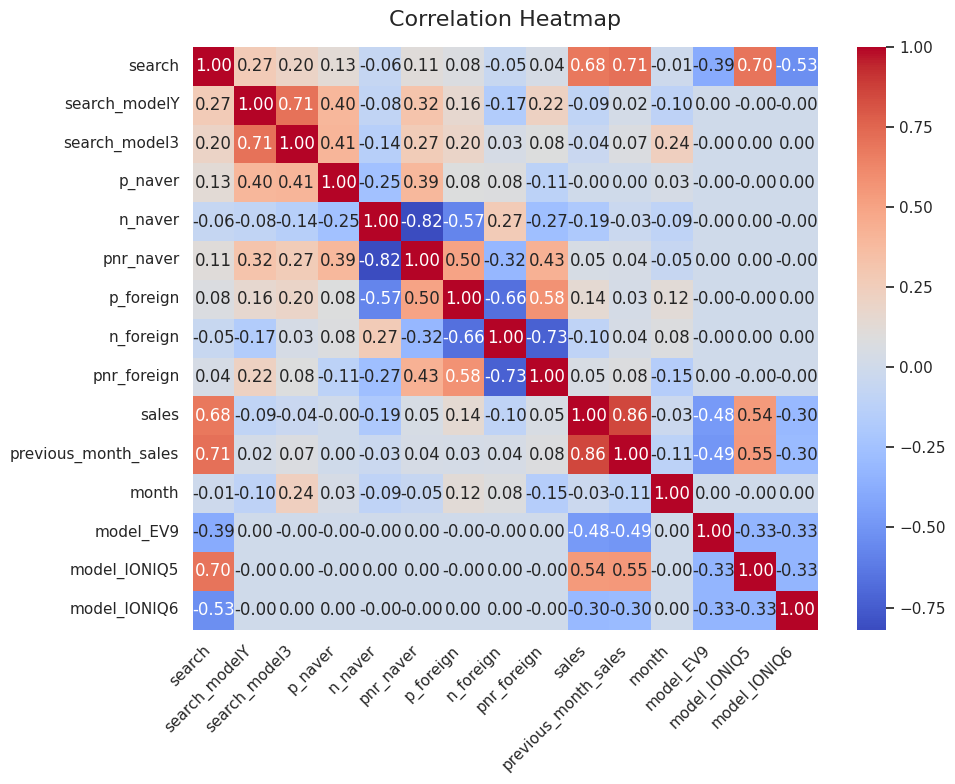

In [67]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Heatmap", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 전처리

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [69]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [70]:
df[['search', 'search_modelY', 'search_model3']] = standard_scaler.fit_transform(df[['search', 'search_modelY', 'search_model3']])
df['sales'] = np.log1p(df['sales'])
df['previous_month_sales'] = np.log1p(df['previous_month_sales'])

### 데이터 나누기

In [131]:
train = df[df['year_month'] <= '2024-06']
test = df[(df['year_month'] > '2024-06') & (df['year_month'] < '2024-11')]

In [132]:
train_X = train.drop(columns=['year_month', 'sales'])
train_y = train['sales']
test_X = test.drop(columns=['year_month', 'sales'])
test_y = test['sales']

In [133]:
train_X

,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,previous_month_sales,month,model_EV9,model_IONIQ5,model_IONIQ6
0,2.235594,1.945425,0.611986,0.33,0.19,1.73,0.50,0.00,10.00,9.236593,1,0,1,0
1,0.814637,-1.256649,-1.546679,0.32,0.09,3.52,0.50,0.00,10.00,8.863050,2,0,1,0
2,0.720690,-1.537533,-1.724103,0.36,0.10,3.56,0.75,0.25,2.73,9.185740,3,0,1,0
3,1.542731,1.720718,0.611986,0.39,0.05,7.65,1.00,0.00,20.00,9.124347,4,0,1,0
4,0.544538,-0.947677,-1.457967,0.25,0.11,2.25,0.75,0.00,30.00,9.169310,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.192235,-0.385910,-0.718698,0.32,0.18,1.77,1.00,0.00,20.00,8.506334,2,1,0,0
83,0.027827,1.187039,1.262542,0.34,0.05,6.67,1.00,0.00,10.00,7.883069,3,1,0,0
84,-0.512371,0.372476,0.316278,0.38,0.12,3.14,0.50,0.50,0.91,8.176110,4,1,0,0
85,-0.030890,0.400565,-0.600415,0.31,0.08,3.83,0.75,0.25,2.73,7.596894,5,1,0,0


### 모델링

변수선택

In [134]:
import statsmodels.api as sm

In [135]:
def stepwise_feature_selection(train_X, train_y, variables=train_X.columns.tolist() ):
    y = train_y ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder:
            X = train_X[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = train_X[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(train_X[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(20,5))
    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables

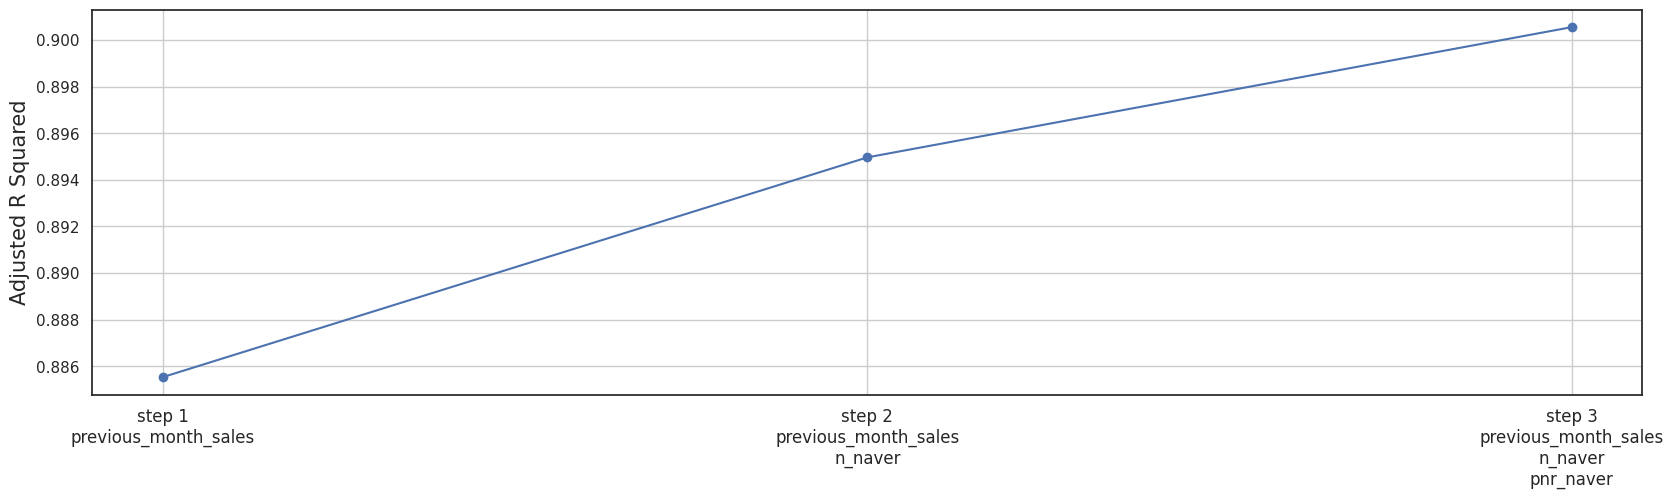

In [136]:
selected_features = stepwise_feature_selection(train_X, train_y)

In [137]:
# Stepwise Selection 함수
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False

        # Forward Step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_col]])).fit()
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"Add  {best_feature:>10} with p-value {best_pval:.6f}")

        # Backward Step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        pvalues = model.pvalues.iloc[1:]  # Skip the intercept
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"Drop {worst_feature:>10} with p-value {worst_pval:.6f}")

        if not changed:
            break

    return included

In [138]:
stepwise_selection(train_X, train_y, verbose=True)

Add  previous_month_sales with p-value 0.000000
Add     n_naver with p-value 0.008744


['previous_month_sales', 'n_naver']

모델링

In [139]:
import statsmodels.formula.api as smf

In [140]:
model = sm.OLS(train_y, train_X).fit()

In [141]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              824.2
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                    2.96e-61
Time:                        08:31:18   Log-Likelihood:                         -63.705
No. Observations:                  72   AIC:                                      155.4
Df Residuals:                      58   BIC:                                      187.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [142]:
model = smf.ols("sales ~ pnr_naver + previous_month_sales - 1", data=train).fit()

In [143]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              4789.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                    1.33e-75
Time:                        08:31:23   Log-Likelihood:                         -77.102
No. Observations:                  72   AIC:                                      158.2
Df Residuals:                      70   BIC:                                      162.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

성능 평가

In [144]:
pred_y = model.predict(test_X)

In [145]:
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
# 회귀모델
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
r2 = r2_score(test_y, pred_y)
print(f"RMSE for Linear Regression : {round(rmse, 2)}")
print(f"R Squared for Linear Regression: {round(r2, 2)}")

RMSE for Linear Regression : 0.31
R Squared for Linear Regression: 0.77


In [108]:
from sklearn.linear_model import Lasso, Ridge

In [109]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(train_X, train_y)

Lasso(alpha=0.1)

In [110]:
lasso_pred = lasso.predict(test_X)

In [111]:
# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(train_X, train_y)

Ridge(alpha=0.1)

In [112]:
ridge_pred = ridge.predict(test_X)

In [113]:
# lasso
lasso_rmse = np.sqrt(mean_squared_error(test_y, lasso_pred))
lasso_r2 = r2_score(test_y, lasso_pred)
print(f"RMSE for Lasso Model: {round(lasso_rmse, 2)}")
print(f"R Squared for Lasso Model: {round(lasso_r2, 2)}")

RMSE for Lasso Model: 0.45
R Squared for Lasso Model: 0.5


In [114]:
# ridge
ridge_rmse = np.sqrt(mean_squared_error(test_y, ridge_pred))
ridge_r2 = r2_score(test_y, ridge_pred)
print(f"RMSE for Ridge Model : {round(ridge_rmse, 2)}")
print(f"R Squared for Ridge Model : {round(ridge_r2, 2)}")

RMSE for Ridge Model : 0.43
R Squared for Ridge Model : 0.55
